In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../data/MushroomDataset"))


['secondary_data.csv', 'secondary_data_meta.txt', 'primary_data_meta.txt', 'primary_data.csv', 'mushrooms_UCIupdated.csv']


In [2]:
data=pd.read_csv("../data/MushroomDataset/mushrooms_UCIupdated.csv")

A mushroom, or toadstool, is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground on soil or on its food source. 

In this kernel, looking at the various properties of a mushroom, we will predict whether the mushroom is edible or poisonous. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In this dataset, there are various features and following table shows first 5 rows in dataset.

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


 To be more understandable, let's write properties one by one.

**classes:** edible=e, poisonous=p

**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises:** bruises=t,no=f

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment:** attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Also, following image shows mushroom parts as we mentioned above.

![](https://i.pinimg.com/originals/0a/c6/4f/0ac64fb5a9c29823572de772f4ba1ff1.jpg)

**Cap:** The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.

**Gills, Pores, or Teeth:** These structures appear under the mushroom's cap. They look similar to a fish's gills.

**Ring:** The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.

**Stem or Stipe:** The stem is the tall structure that holds the cap high above the ground.

**Volva:** The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.

**Spores:** Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom. 

(resource:https://1stchineseherbs.com/parts-of-mushrooms/, http://www.visualdictionaryonline.com/plants-gardening/plants/mushroom/structure-mushroom.php)

we've renamed all the features before we started analysis.

In [5]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

Now, our dataset looks like this:

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [7]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]

CAP SHAPE EXAMPLES

![](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic15)

CAP SURFACE EXAMPLES

![](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic16)

COMPARISON OF CAP SHAPE-SURFACE AND COLOR ACCORDING TO THEIR CLASSES

Following figure shows numbers and probabilities of cap shape- cap surface and cap color features according to the state of the mushroom being edible or poisonous.

In [8]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

cap_shape_dim = go.parcats.Dimension(
    values=data["cap-shape"].values,
    label="Cap Shape"
)

cap_surface_dim = go.parcats.Dimension(
  values=data["cap-surface"].values,
  label="Cap Surface"
)
cap_color_dim = go.parcats.Dimension(
  values=data["cap-color"].values,
  label="Cap Color"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data1 = [
    go.Parcats(
        dimensions=[class_dim,cap_surface_dim,cap_shape_dim,cap_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data1)

For example in dataset, the probability of a mushroom being poisonous is 0.482 and there are 3916 poisonous mushrooms. 

* The probability of a mushroom is edible, the surface of the cap is smooth, cap shape is convex and the cap color to be brown is 0.015 and there are 124 such mushrooms in dataset. 

Or 

* The probability of a mushroom is poisonous, the surface of the cap is fibrous, cap shape is flat and the cap color to be yellow is 0.020 and there are 164 such mushrooms in dataset. and so on...


Looking these features, it is difficult to say that a mushroom is poisonous or edible. Because there are no significant differences between features.

BRUISES

Following figure shows bruises counts with mushroom types. And we can say, most of edible mushrooms have bruises, however, a lot of the poisonous mushrooms haven't.

In [9]:
data4 = [
  go.Histogram(
    histfunc = "count",
    x = edible["bruises"], 
    name = "edible",
    marker=dict(color="lightgreen",line=dict(color='darkgreen', width=5))
  ),
  go.Histogram(
    histfunc = "count",
    x = poisonous["bruises"],
    name = "poisonous",
    marker=dict(color="mistyrose",line=dict(color='maroon', width=5)),
    opacity=0.75
  )
]

layout = go.Layout(
    title='Bruises Counts with Mushroom Type',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=data4, layout=layout)
iplot(fig)


ODOR

Following bar chart shows odor features according to mushroom type. We can see if a odor of a mushroom is almond or anise, it is edible or if it is musty, creosote, pungent, fishy, spicy or foul, it is poisonous. Moreover, even most of the mushrooms which have none odor are poisonous, there are 120 mushrooms in dataset both edible and have no odor. 

Odor feature is a really important feature to distinguish between a mushroom that is edible or poisonous.

In [10]:
odor_edible=pd.DataFrame(edible["odor"].value_counts())
odor_poisonous=pd.DataFrame(poisonous["odor"].value_counts())

layout = go.Layout(yaxis=go.layout.YAxis(title='Color'),
                   xaxis=go.layout.XAxis(
                       range=[-1200, 1200],
                     tickvals=[-1000, -700, -300, 0, 300, 700, 1000],
                       ticktext=[1000, 700, 300, 0, 300, 700, 1000],
                       title='Count'),
                   barmode='overlay',
                   bargap=0.1,
                   paper_bgcolor='rgb(243, 243, 243)',
                   plot_bgcolor='cornsilk')

data3 = [go.Bar(y=odor_edible.index,
               x=odor_edible["odor"],
               orientation='h',
               name='Edible',
               hoverinfo='x',
               marker=dict(color='lightslategrey')
               ),
        go.Bar(y=odor_poisonous.index,
               x=-1*odor_poisonous["odor"],
               orientation='h',
               name='Poisonous',
               hoverinfo='text',
               text=odor_poisonous["odor"].astype('int'),
               marker=dict(color='darksalmon')
               )]
iplot(dict(data=data3, layout=layout))

GILL PROPERTIES

In [11]:
gill_attachment_edible=pd.DataFrame(edible["gill-attachment"].value_counts())
gill_attachment_poisonous=pd.DataFrame(poisonous["gill-attachment"].value_counts())
gill_spacing_edible=pd.DataFrame(edible["gill-spacing"].value_counts())
gill_spacing_poisonous=pd.DataFrame(poisonous["gill-spacing"].value_counts())
gill_size_edible=pd.DataFrame(edible["gill-size"].value_counts())
gill_size_poisonous=pd.DataFrame(poisonous["gill-size"].value_counts())
gill_color_edible=pd.DataFrame(edible["gill-color"].value_counts())
gill_color_poisonous=pd.DataFrame(poisonous["gill-color"].value_counts())

GILL ATTACHMENT EXAMPLES:
![](http://urbanmushrooms.com/images/183.jpg)

GILL SPACING EXAMPLES:
![](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic17)

Following figure shows gill properties like gill attachment, gill spacing, gill size and gill color.

In [12]:
trace0 = go.Scatter(
    x = gill_attachment_edible.index,
    y = gill_attachment_edible["gill-attachment"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace1 = go.Scatter(
    x = gill_attachment_poisonous.index,
    y = gill_attachment_poisonous["gill-attachment"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)
trace2 = go.Scatter(
    x = gill_spacing_edible.index,
    y = gill_spacing_edible["gill-spacing"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace3 = go.Scatter(
    x = gill_spacing_poisonous.index,
    y = gill_spacing_poisonous["gill-spacing"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                    symbol=220
                   )
)
trace4 = go.Scatter(
    x = gill_size_edible.index,
    y = gill_size_edible["gill-size"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace5 = go.Scatter(
    x = gill_size_poisonous.index,
    y = gill_size_poisonous["gill-size"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)
trace6 = go.Scatter(
    x = gill_color_edible.index,
    y = gill_color_edible["gill-color"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace7 = go.Scatter(
    x = gill_color_poisonous.index,
    y = gill_color_poisonous["gill-color"],
    mode = 'markers',
    name = 'Poisonous',
     marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)

fig = tools.make_subplots(rows=2, cols=2, 
                          subplot_titles=('Gill Attachment','Gill Size', 'Gill Spacing',"Gill Color"))


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 2, 2)
fig.append_trace(trace7, 2, 2)

fig['layout'].update(showlegend=False,height=800, width=800, title='Gill Properties' ,paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="moccasin")
iplot(fig)

/home/pablo/KSCHOOL/14_PFM/mushrooms-PFM/pfmenv/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Gill attachment and gill spacing are not distinctive features. Most of the mushrooms in dataset have free gill attachment and close gill spacing. However, Gill- size and gill colors can be. We can say a mushroom which has buff and green gill color is poisonous or red and orange gill color is edible. And also, most of the edible mushrooms have broad gill-size but numbers of poisonous mushrooms which have broad or narrow are close to each other.

STALK PROPERTIES

In [13]:
stalk_shape_edible=pd.DataFrame(edible["stalk-shape"].value_counts())
stalk_shape_poisonous=pd.DataFrame(poisonous["stalk-shape"].value_counts())
stalk_root_edible=pd.DataFrame(edible["stalk-root"].value_counts())
stalk_root_poisonous=pd.DataFrame(poisonous["stalk-root"].value_counts())
stalk_surface_above_ring_edible=pd.DataFrame(edible["stalk-surface-above-ring"].value_counts())
stalk_surface_above_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-above-ring"].value_counts())
stalk_surface_below_ring_edible=pd.DataFrame(edible["stalk-surface-below-ring"].value_counts())
stalk_surface_below_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-below-ring"].value_counts())
stalk_color_above_ring_edible=pd.DataFrame(edible["stalk-color-above-ring"].value_counts())
stalk_color_above_ring_poisonous=pd.DataFrame(poisonous["stalk-color-above-ring"].value_counts())
stalk_color_below_ring_edible=pd.DataFrame(edible["stalk-color-below-ring"].value_counts())
stalk_color_below_ring_poisonous=pd.DataFrame(poisonous["stalk-color-below-ring"].value_counts())

Following radar charts show stalk properties of mushrooms according to their classes like stalk shape, stalk root, stalk surface above and below ring.

In [14]:
data8=[go.Scatterpolar(
      r = list(stalk_shape_edible["stalk-shape"].values),
      theta = stalk_shape_edible.index,
      fill = 'toself',
      name = "Edible",
    thetaunit = "radians",
    ),
 go.Scatterpolar(
      r = list(stalk_shape_poisonous["stalk-shape"].values),
      theta = stalk_shape_poisonous.index,
      fill = 'toself',
      name = 'Poisonous',
    thetaunit = "radians"
    ),
go.Scatterpolar(
      r = stalk_root_edible["stalk-root"].values,
      theta = stalk_root_edible.index,
      fill = 'toself',
      name = "Edible",
    thetaunit = "radians",
     subplot = "polar2"
    ),
go.Scatterpolar(
      r = stalk_root_poisonous["stalk-root"].values,
      theta =stalk_root_poisonous.index,
      fill = 'toself',
      name = 'Poisonous',
    subplot = "polar2",
    thetaunit = "radians"
    ),
go.Scatterpolar(
      r = stalk_surface_above_ring_edible["stalk-surface-above-ring"].values,
      theta = stalk_surface_above_ring_edible.index,
      fill = 'toself',
      name = "Edible",
    subplot = "polar3",
     thetaunit = "radians"
    ),
go.Scatterpolar(
      r = stalk_surface_above_ring_poisonous["stalk-surface-above-ring"].values,
      theta = stalk_surface_above_ring_poisonous.index,
      fill = 'toself',
      name = 'Poisonous',
    subplot = "polar3",
     thetaunit = "radians"
    ),
go.Scatterpolar(
        r = stalk_surface_below_ring_edible["stalk-surface-below-ring"].values,
      theta = stalk_surface_below_ring_edible.index,
      fill = 'toself',
      name = "Edible",
    subplot = "polar4"
    ),
go.Scatterpolar(
      r = stalk_surface_below_ring_poisonous["stalk-surface-below-ring"].values,
      theta = stalk_surface_below_ring_poisonous.index,
      fill = 'toself',
      name = "Poisonoıs",
    subplot = "polar4",
    
    ),]
layout = go.Layout(
    showlegend=False,
    paper_bgcolor='moccasin',
    title="STALK PROPERTIES",
    font=dict(family='Gravitas One',size=20,color='darkred'),
     
    
    polar = dict(
      bgcolor="linen",
      domain = dict(
        y = [0.60, 0.90],
        x = [0, 0.48]
      ),
      radialaxis = dict(
             visible = False,
        angle = 45
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 6,
          gridwidth=3,
          tickfont=dict(size=11,color="black"),
      )
    ),
    polar2 = dict(
        bgcolor="linen",
      domain = dict(
        y = [0.60, 0.90],
        x = [0.52, 1]
      ),
      radialaxis = dict(
             visible = False,
        angle = 45
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 5,
           gridwidth=3,
          tickfont=dict(size=11,color="black"),
      )),
     polar3 = dict(
         bgcolor="linen",
      domain = dict(
        x = [0, 0.48],
        y = [0, 0.30]
      ),
      
    radialaxis = dict(
             visible = False,
        
        angle = 45
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 6,
           gridwidth=3,
          tickfont=dict(size=11,color="black"),
      )
     
    ),
    polar4 = dict(
         bgcolor="linen",
      domain = dict(
        y = [0, 0.30],
        x = [0.52, 1]
      ),
   radialaxis = dict(
             visible = False,
        angle = 45,
       
      ),
      angularaxis = dict(
        direction = "clockwise",
        period = 4,
           gridwidth=3,
          tickfont=dict(size=11,color="black")
      )
    ),
     annotations=[dict(showarrow=False,text="Stalk Shape",x=0.18,y=1.05,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5),
                                  dict(showarrow=False,text="Stalk Root",x=0.83,y=1.05,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5),
                 dict(showarrow=False,text="Stalk Surface Above Ring",x=0.13,y=0.40,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5),
                 dict(showarrow=False,text="Stalk Surface Below Ring",x=0.88,y=0.40,xref="paper",yref="paper",font=dict(size=15,color="midnightblue"),bgcolor="lightyellow",borderwidth=5)]
)

fig = go.Figure(data=data8,layout=layout)
iplot(fig)

And following bar chart shows number of stalk colors above and below ring. Same as the cap color, mushrooms which have buff, cinnamon,yellow or brown stalk color above or below ring are poisonous.

In [15]:
value1=stalk_color_above_ring_edible["stalk-color-above-ring"].values
label1=stalk_color_above_ring_edible.index
value2=stalk_color_above_ring_poisonous["stalk-color-above-ring"].values
label2=stalk_color_above_ring_poisonous.index
value3=stalk_color_below_ring_edible["stalk-color-below-ring"].values
label3=stalk_color_below_ring_edible.index
value4=stalk_color_below_ring_poisonous["stalk-color-below-ring"].values
label4=stalk_color_below_ring_poisonous.index

trace1=go.Bar(
      x = value1,
      y =label1 ,
      name='Edible- Stalk Color Above Ring',
    orientation = 'h',
    marker = dict(
        color = "darksalmon",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3),
        opacity=0.8,
    ))
    
trace2=go.Bar(
     x = value2 ,
     y = label2,
      name='Poisonous-Stalk Color Above Ring',
    orientation = 'h',
    marker = dict(
        color = "plum",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
    
trace3=go.Bar(
     x = value3,
     y = label3,
            name='Edible-Stalk Color Below Ring',
    orientation = 'h',
    marker = dict(
        color = "palegreen",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
   
trace4=go.Bar(
      x =value4 ,
      y =label4 ,
             name='Poisonous- Stalk Color Below Ring',
    orientation = 'h',
    marker = dict(
        color = "sienna",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
   

fig= tools.make_subplots(rows=1, cols=2,subplot_titles=('Stalk Color Counts Above Ring','Stalk Color Counts Below Rings'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

fig['layout'].update(showlegend=True,height=600, width=800, barmode='stack',legend=dict(x=.58, y=-0.1,orientation="h",font=dict(size=11,color='#000')),
                     title='Stalk Colors Above and Below Ring')
iplot(fig)

/home/pablo/KSCHOOL/14_PFM/mushrooms-PFM/pfmenv/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



VEIL PROPERTIES

In [16]:
edible_veil_color=pd.DataFrame(edible["veil-color"].value_counts())
poisonous_veil_color=pd.DataFrame(poisonous["veil-color"].value_counts())

Following bar chart shows number of veil colors according to mushroom classes. Most of the mushrooms have white veil color in dataset. Also edible mushrooms veil colors can be orange or brown. 

In [17]:
trace1 = go.Bar(
    x=edible_veil_color.index,
    y=edible_veil_color["veil-color"].values,
    text=edible_veil_color["veil-color"].values,
    textposition = 'auto',
    name="Edible",
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=poisonous_veil_color.index,
    y=poisonous_veil_color["veil-color"],
    text=poisonous_veil_color["veil-color"],
    name="Poisonous",
    textposition = 'auto',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
    
)
Layout=go.Layout(
    title='Veil Colors',
    barmode='stack',
    paper_bgcolor='rgba(245, 246, 249, 1)',
    plot_bgcolor='rgba(245, 246, 249, 1)'
   
)

data65 = [trace1,trace2]
fig = go.Figure(data=data65, layout=Layout)
iplot(fig)

RING NUMBER

Following heatmap shows ring numbers of mushrooms according to their classes. For instance all of the edible mushrooms have one or two ring numbers. However, if you see a mushroom which has no ring number, it has to be poisonous!!

In [18]:
import plotly.figure_factory as ff

z=[[0, 3680, 528], [36, 3808, 72]]

x=['None', 'One', 'Two']
y = ['Edible', 'Poisonous']

z_text = [["0", '3680', '528'],  
          ['36', '3808', '72']]

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Blackbody')
iplot(fig)

RING TYPE EXAMPLES: 

![](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic20)

Following bar chart shows number of mushrooms which have different ring type according to their classes. For example, most of the mushrooms which have pendant or flaring ring types are edible, or if they have large ring type, it is most likely poisonous.

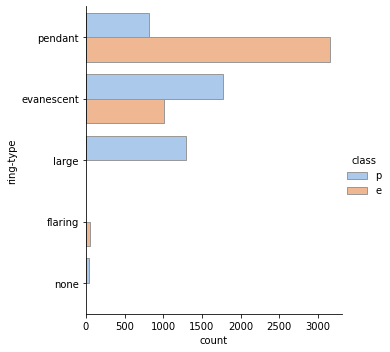

In [19]:
sns.catplot(y="ring-type", hue="class", kind="count",height=5,
            palette="pastel", edgecolor=".6",
            data=data)

SPORE PRINT COLOR

Following pie charts show spore print color percentages in dataset according class of a mushroom. For example 41% of edible mushrooms have brown spore print color or 40.4% of poisonous mushrooms have chocolate print color.

In [20]:
fig = {
  "data": [
    {
      "values": [1744,1648,576,48,48,48,48,48],
      "labels": ['Brown','Black','White','Orange',"Purple","Chocolate","Yellow","Buff"],
      "domain": {"column": 0},
      "name": "Edible Mushrooms",
      "hoverinfo":"label+percent+name",
      "type": "pie",
         "hole": .4,
        'marker': {'colors': ['brown', 'black', 'white', 'orange',"purple","sienna","yellow","peru"],
                  "line":{"color":'#000000',"width":2}}
    },
    {
      "values": [1812,1584,224,224,72],
      "labels": ["White","Chocolate","Brown","Black","Green"],   
      "domain": {"column": 1},
      "name": "Poisonous Mushrooms",
      "hoverinfo":"label+percent+name",
         "hole": .4,
      "type": "pie",
        "marker": {"colors":["white","sienna","brown","black","green"],
                  "line":{"color":'#000000',"width":2}}

    }],
  "layout": {
      
        "title":"Edible and Poisonous Mushrooms Spore Print Color Percentages",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Edible",
                "x": 0.20,
                "y": 1.05
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poisonous",
                "x": 0.85,
                "y": 1.05
            }
        ]
    }
}
iplot(fig)

POPULATION AND HABITAT

Following figure type is same with cap properties. But it shows population and habitat properties. 

If a mushroom has numerios or abundant population and if it lives in grass it is probabily an edible mushroom. Same as if a mushroom has several population and if it lives in paths it's most likely poisonous.

In [21]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

population_dim = go.parcats.Dimension(
    values=data["population"].values,
    label="Population"
)

habitat_dim = go.parcats.Dimension(
  values=data["habitat"].values,
  label="Habitat"
)


# Create parcats trace
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'coral'], [1, 'gray']];
data19 = [
    go.Parcats(
        dimensions=[class_dim,population_dim,habitat_dim],
        line={'color': color,"showscale":True,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Arial'},
        tickfont={'size': 16, 'family': 'Arial'},
        arrangement='freeform',
    )

]


iplot(data19)

ARTIFICIAL NEURAL NETWORK

To perdict whether a mushroom is poisonous or edible, we use ANN classification. 

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [23]:
y = data["class"].values
x = data.drop(["class"],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 70,batch_size=10)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

2022-04-03 19:20:15.366092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-03 19:20:15.366111: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/70


/tmp/ipykernel_32218/3537683449.py:12: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.

2022-04-03 19:20:16.342238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-03 19:20:16.342261: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-03 19:20:16.342278: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pchome): /proc/driver/nvidia/version does not exist
2022-04-03 19:20:16.342465: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-criti

434/434 [==============================] - 1s 808us/step - loss: 0.5474 - accuracy: 0.7789
Epoch 2/70
434/434 [==============================] - 0s 800us/step - loss: 0.3928 - accuracy: 0.8804
Epoch 3/70
434/434 [==============================] - 0s 802us/step - loss: 0.3496 - accuracy: 0.8846
Epoch 4/70
434/434 [==============================] - 0s 814us/step - loss: 0.3201 - accuracy: 0.8880
Epoch 5/70
434/434 [==============================] - 0s 803us/step - loss: 0.3028 - accuracy: 0.8915
Epoch 6/70
434/434 [==============================] - 0s 821us/step - loss: 0.2859 - accuracy: 0.8998
Epoch 7/70
434/434 [==============================] - 0s 998us/step - loss: 0.2719 - accuracy: 0.9056
Epoch 8/70
434/434 [==============================] - 0s 982us/step - loss: 0.2632 - accuracy: 0.9104
Epoch 9/70
434/434 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.9116
Epoch 10/70
434/434 [==============================] - 1s 1ms/step - loss: 0.2555 - accuracy: 0

After we run the model, we have 1 accuracy mean and 0 accuracy variance. Also following graphs shows tarining and validation accuracies and training & validation loss values.

In [27]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)

Epoch 1/70
130/130 [==============================] - 1s 2ms/step - loss: 0.6710 - accuracy: 0.6769 - val_loss: 0.5875 - val_accuracy: 0.8062
Epoch 2/70
130/130 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8546 - val_loss: 0.3877 - val_accuracy: 0.8215
Epoch 3/70
130/130 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8815 - val_loss: 0.3182 - val_accuracy: 0.8708
Epoch 4/70
130/130 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.9092 - val_loss: 0.2829 - val_accuracy: 0.8831
Epoch 5/70
130/130 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9254 - val_loss: 0.2511 - val_accuracy: 0.9108
Epoch 6/70
130/130 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9377 - val_loss: 0.2232 - val_accuracy: 0.9077
Epoch 7/70
130/130 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9454 - val_loss: 0.2403 - val_accuracy: 0.8985
Epoch 

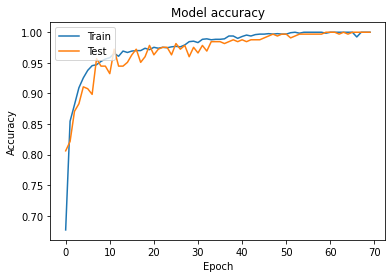

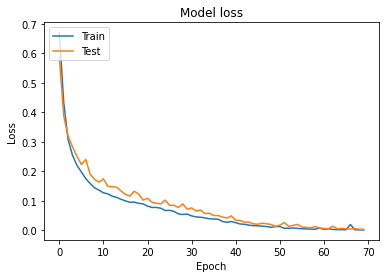

In [34]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()